In [35]:
pip install pandas numpy scikit-learn nltk matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
# Load the train and test datasets
train_data = pd.read_csv('/workspaces/AI-Deep-Learning-Journey/Deep_Learning/train.csv')  # Adjust path if needed
test_data = pd.read_csv('/workspaces/AI-Deep-Learning-Journey/Deep_Learning/test.csv')    # Adjust path if needed

# Display the first few rows of the train dataset
train_data.head()

,text,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,If only to avoid making this type of film in t...,0
3,This film was probably inspired by Godard's Ma...,0
4,"Oh, brother...after hearing about this ridicul...",0


In [38]:
# Convert text to lowercase
train_data['text'] = train_data['text'].str.lower()
test_data['text'] = test_data['text'].str.lower()

# Remove stopwords
stop_words = stopwords.words('english')
train_data['text'] = train_data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
test_data['text'] = test_data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Display cleaned text
train_data.head()


,text,label
0,rented curious-yellow video store controversy ...,0
1,"""i curious: yellow"" risible pretentious steami...",0
2,avoid making type film future. film interestin...,0
3,"film probably inspired godard's masculin, fémi...",0
4,"oh, brother...after hearing ridiculous film um...",0


In [39]:
# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Transform the train and test text data into TF-IDF matrices
X_train = vectorizer.fit_transform(train_data['text'])
X_test = vectorizer.transform(test_data['text'])

# Target variable (labels) for train and test sets
y_train = train_data['label']
y_test = test_data['label']


In [40]:
# Optionally, further split the train data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [41]:
# Initialize the classifier
model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)


MultinomialNB()

              precision    recall  f1-score   support

           0       0.81      0.88      0.84     12500
           1       0.87      0.79      0.83     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.83     25000
weighted avg       0.84      0.84      0.83     25000



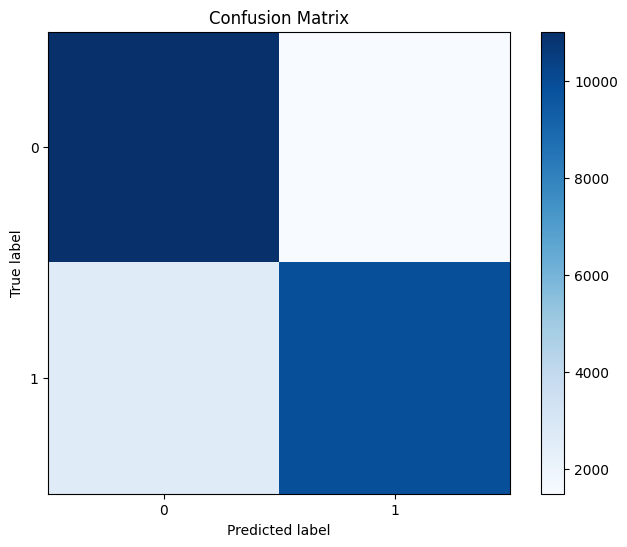

In [42]:
# Predictions on the test set
y_pred = model.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(test_data['label'].unique())), test_data['label'].unique())
plt.yticks(np.arange(len(test_data['label'].unique())), test_data['label'].unique())
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [43]:
import joblib

# Save the trained model
joblib.dump(model, 'nlp_text_classifier_model.pkl')

# Load the model (optional)
loaded_model = joblib.load('nlp_text_classifier_model.pkl')


In [45]:
unsupervised_data = pd.read_csv('/workspaces/AI-Deep-Learning-Journey/Deep_Learning/unsupervised.csv')
unsupervised_data['text'] = unsupervised_data['text'].str.lower()
unsupervised_data['text'] = unsupervised_data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

X_unsupervised = vectorizer.transform(unsupervised_data['text'])
predictions = model.predict(X_unsupervised)

unsupervised_data['predictions'] = predictions
print(unsupervised_data.head())


                                                text  label  predictions
0  precious little diamond. play, script excellen...     -1            0
1  say favourite film time, comment taken lightly...     -1            1
2  saw movie huge fan tv series name starring roy...     -1            1
3  foreign films usually like star japanese perso...     -1            0
4  seeing point return (a great movie) told origi...     -1            0
